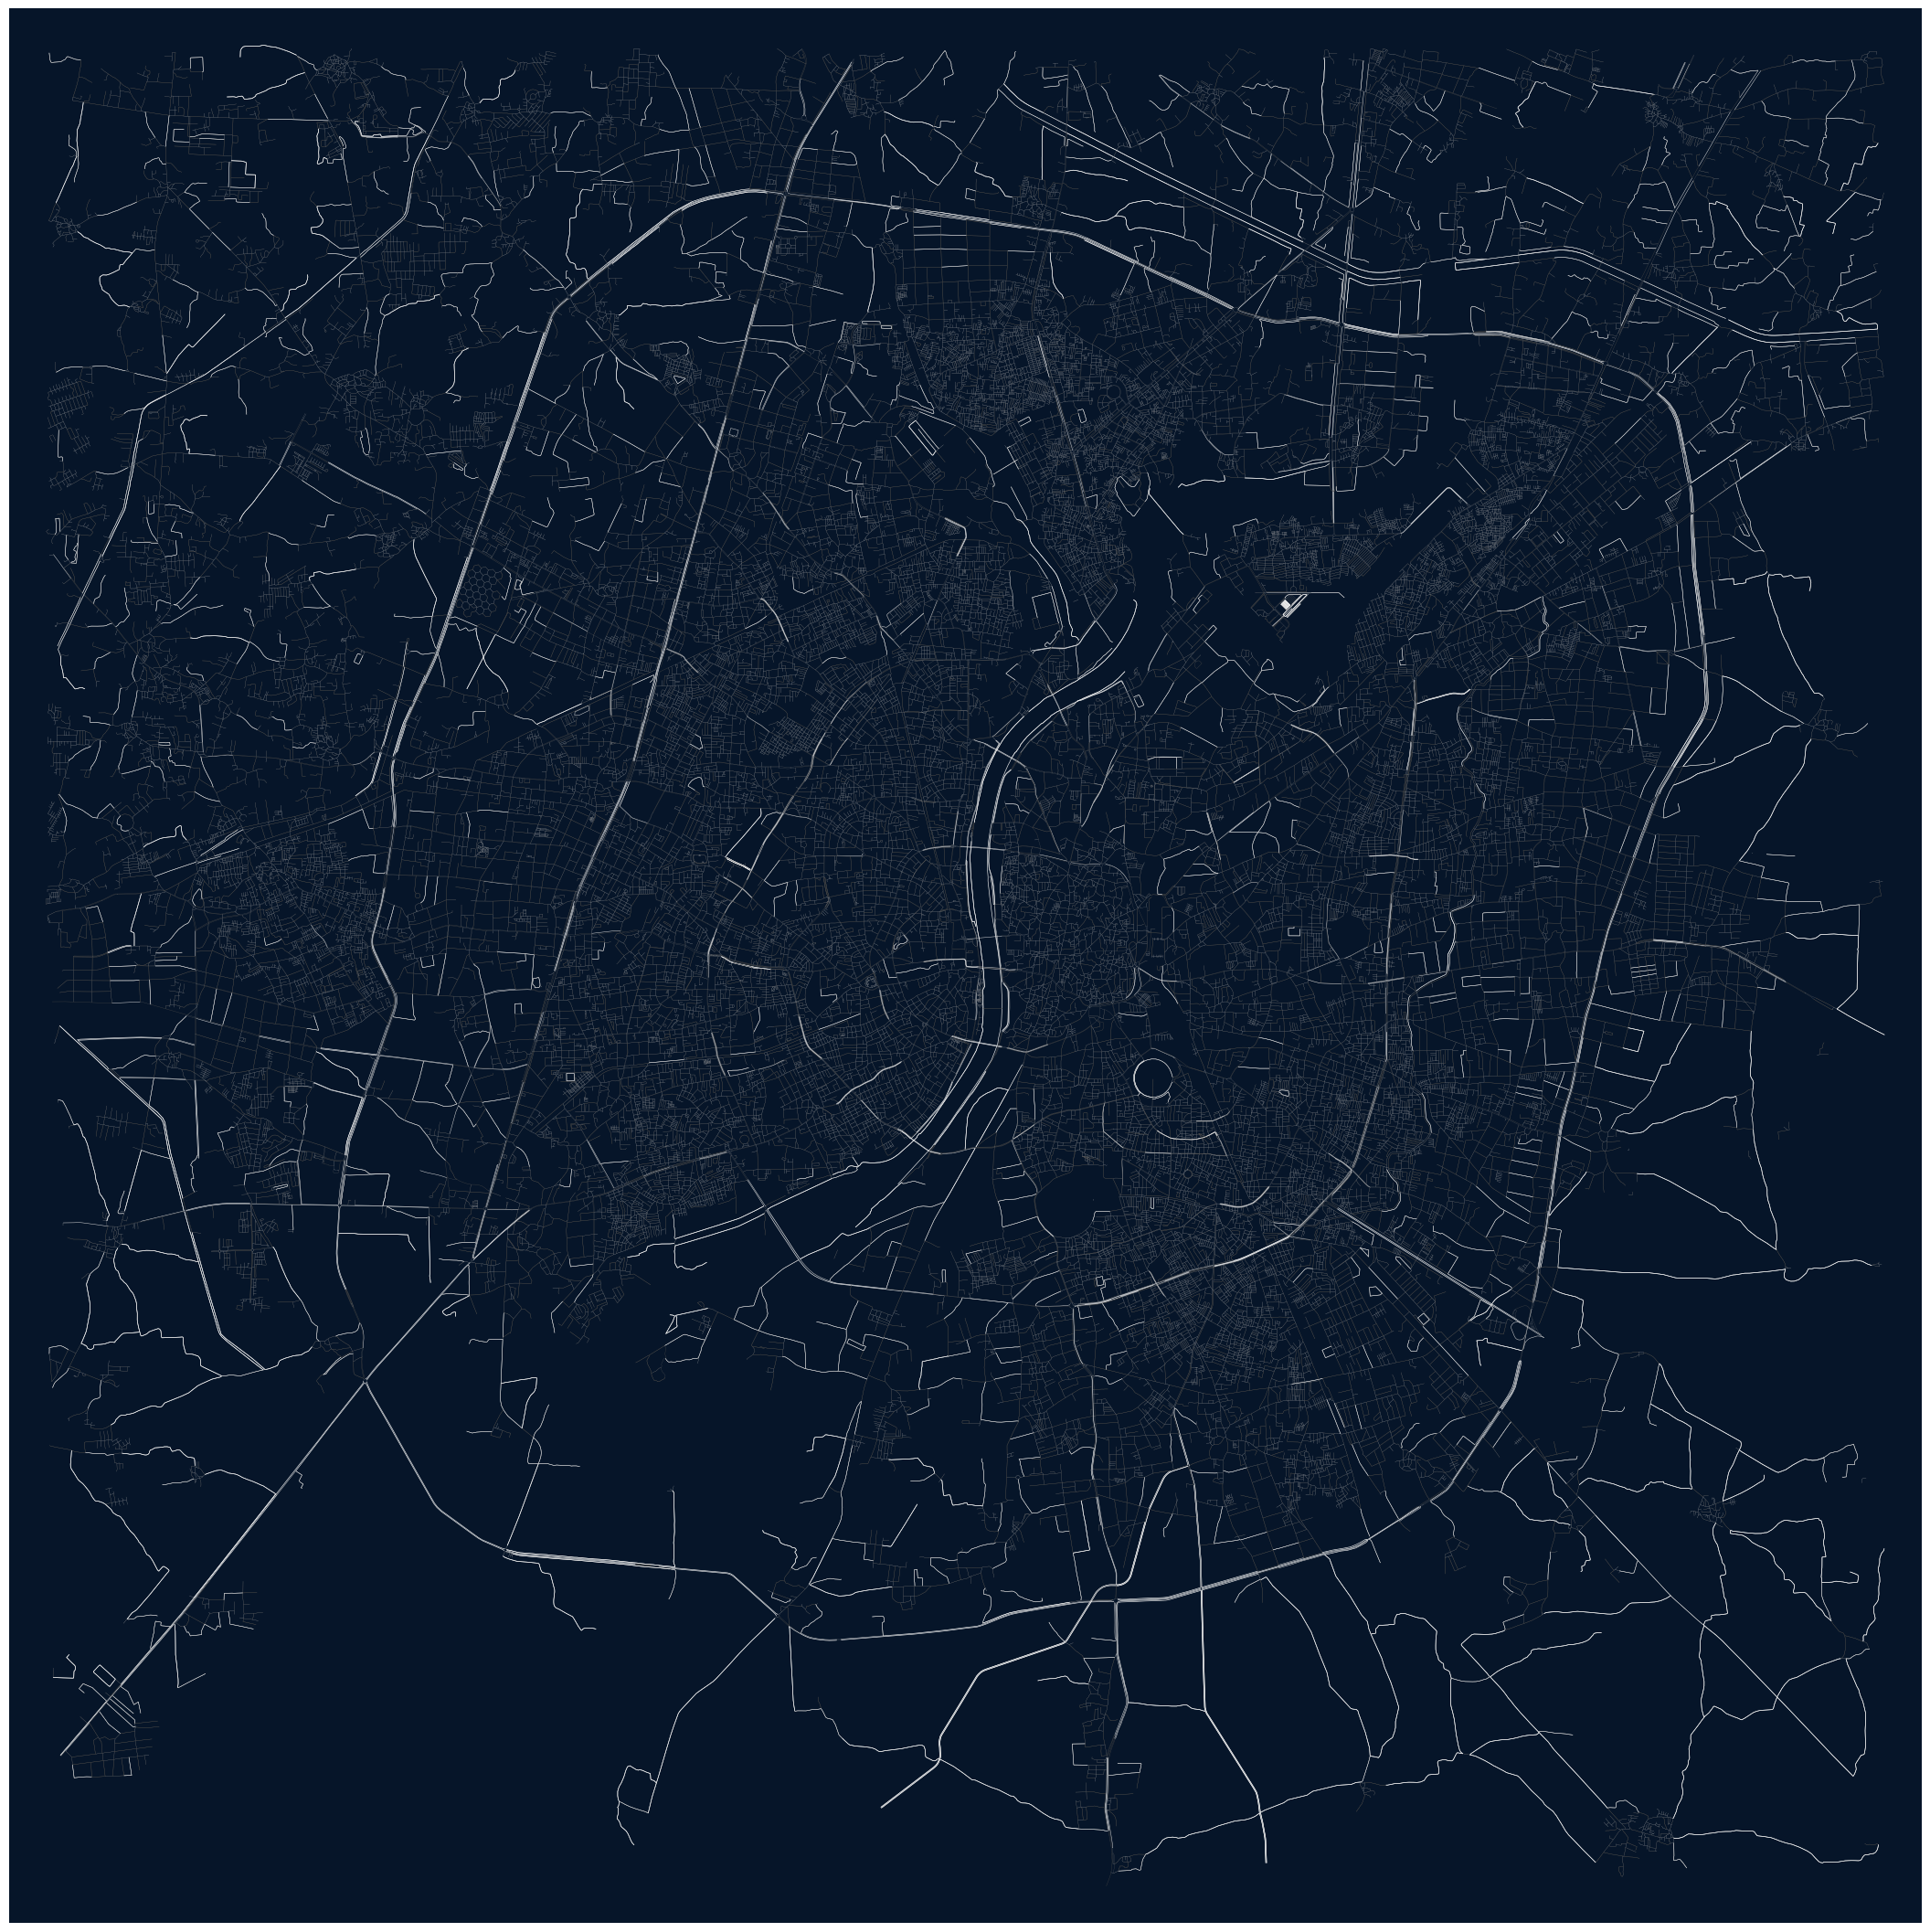

c:\Users\purva\anaconda3\lib\site-packages\osmnx\graph.py:88: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(
c:\Users\purva\anaconda3\lib\site-packages\osmnx\graph.py:88: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(


<Figure size 640x480 with 0 Axes>

c:\Users\purva\anaconda3\lib\site-packages\osmnx\graph.py:88: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(


<Figure size 640x480 with 0 Axes>

In [1]:
# Visualizing Ahmedabad

import osmnx as ox
import networkx as nx

# Define city/cities

# Get data for places

'''
places = ["Ahmedabad, India"]
G = ox.graph_from_place(places,  retain_all=True, simplify = True, network_type='all')
'''

point = (23.0225, 72.5714)
# Center of map
latitude = 23.0225
longitude = 72.5714

bgcolor = "#061529"

G = ox.graph_from_point(point, dist=15000, retain_all=True, simplify = True, network_type='all')

u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    

# List to store colors
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#d5d5d5"
            linewidth = 0.35
        else:
            color = "#ededed"
            linewidth = 0.45
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)
            


fig, ax = ox.plot_graph(G, node_size=0,figsize=(27, 40), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

'''
# Bbox sides
north = latitude + 0.15
south = latitude - 0.15
east = longitude + 0.15
west = longitude - 0.15

fig, ax = ox.plot_graph(G, node_size=0, bbox = (north, south, east, west),
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

'''

fig.tight_layout(pad=0)
#Saves only roadmap
#fig.savefig("Ahmedabad_roadMap.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=False)




G1 = ox.graph_from_point(point, dist=15000, dist_type='bbox', network_type='all', 
                        simplify=True, retain_all=True, truncate_by_edge=False, clean_periphery=False, custom_filter='["natural"~"water"]')
G2 = ox.graph_from_point(point, dist=15000, dist_type='bbox', network_type='all', 
                        simplify=True, retain_all=True, truncate_by_edge=False, clean_periphery=False, custom_filter='["waterway"~"river"]')
Gwater = nx.compose(G1, G2)


u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gwater.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors = []
roadWidths = []

# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#5dc1b9"
            linewidth = 5
        else:
            color = "#5dc1b9"
            linewidth = 1.25
    else:
        color = "#5dc1b9"
        linewidth = 0.5
    roadColors.append(color)    
    roadWidths.append(linewidth)



fig, ax = ox.plot_graph(Gwater, node_size=0,figsize=(27, 40), 
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1, ax=ax)


G3 = ox.graph_from_point(point, dist=15000, dist_type='bbox', network_type='all', 
                        simplify=True, retain_all=True, truncate_by_edge=False, clean_periphery=False, custom_filter='["waterway"~"canal"]')

u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G3.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors = []
roadWidths = []

# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#5dc1b9"
            linewidth = 2.5
        else:
            color = "#5dc1b9"
            linewidth = 1
    else:
        color = "#5dc1b9"
        linewidth = 0.5
    roadColors.append(color)    
    roadWidths.append(linewidth)



fig, ax = ox.plot_graph(G3, node_size=0,figsize=(27, 40), 
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1, ax=ax)




fig.tight_layout(pad=0)
fig.savefig("Ahmedabad_city_and_waterMap.png", dpi=600, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)

C:\Users\purva\AppData\Local\Temp\ipykernel_5612\3723225691.py:23: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  grass_area = ox.geometries_from_point(point, dist=10000, tags={'landuse': 'grass', 'leisure': 'garden'})


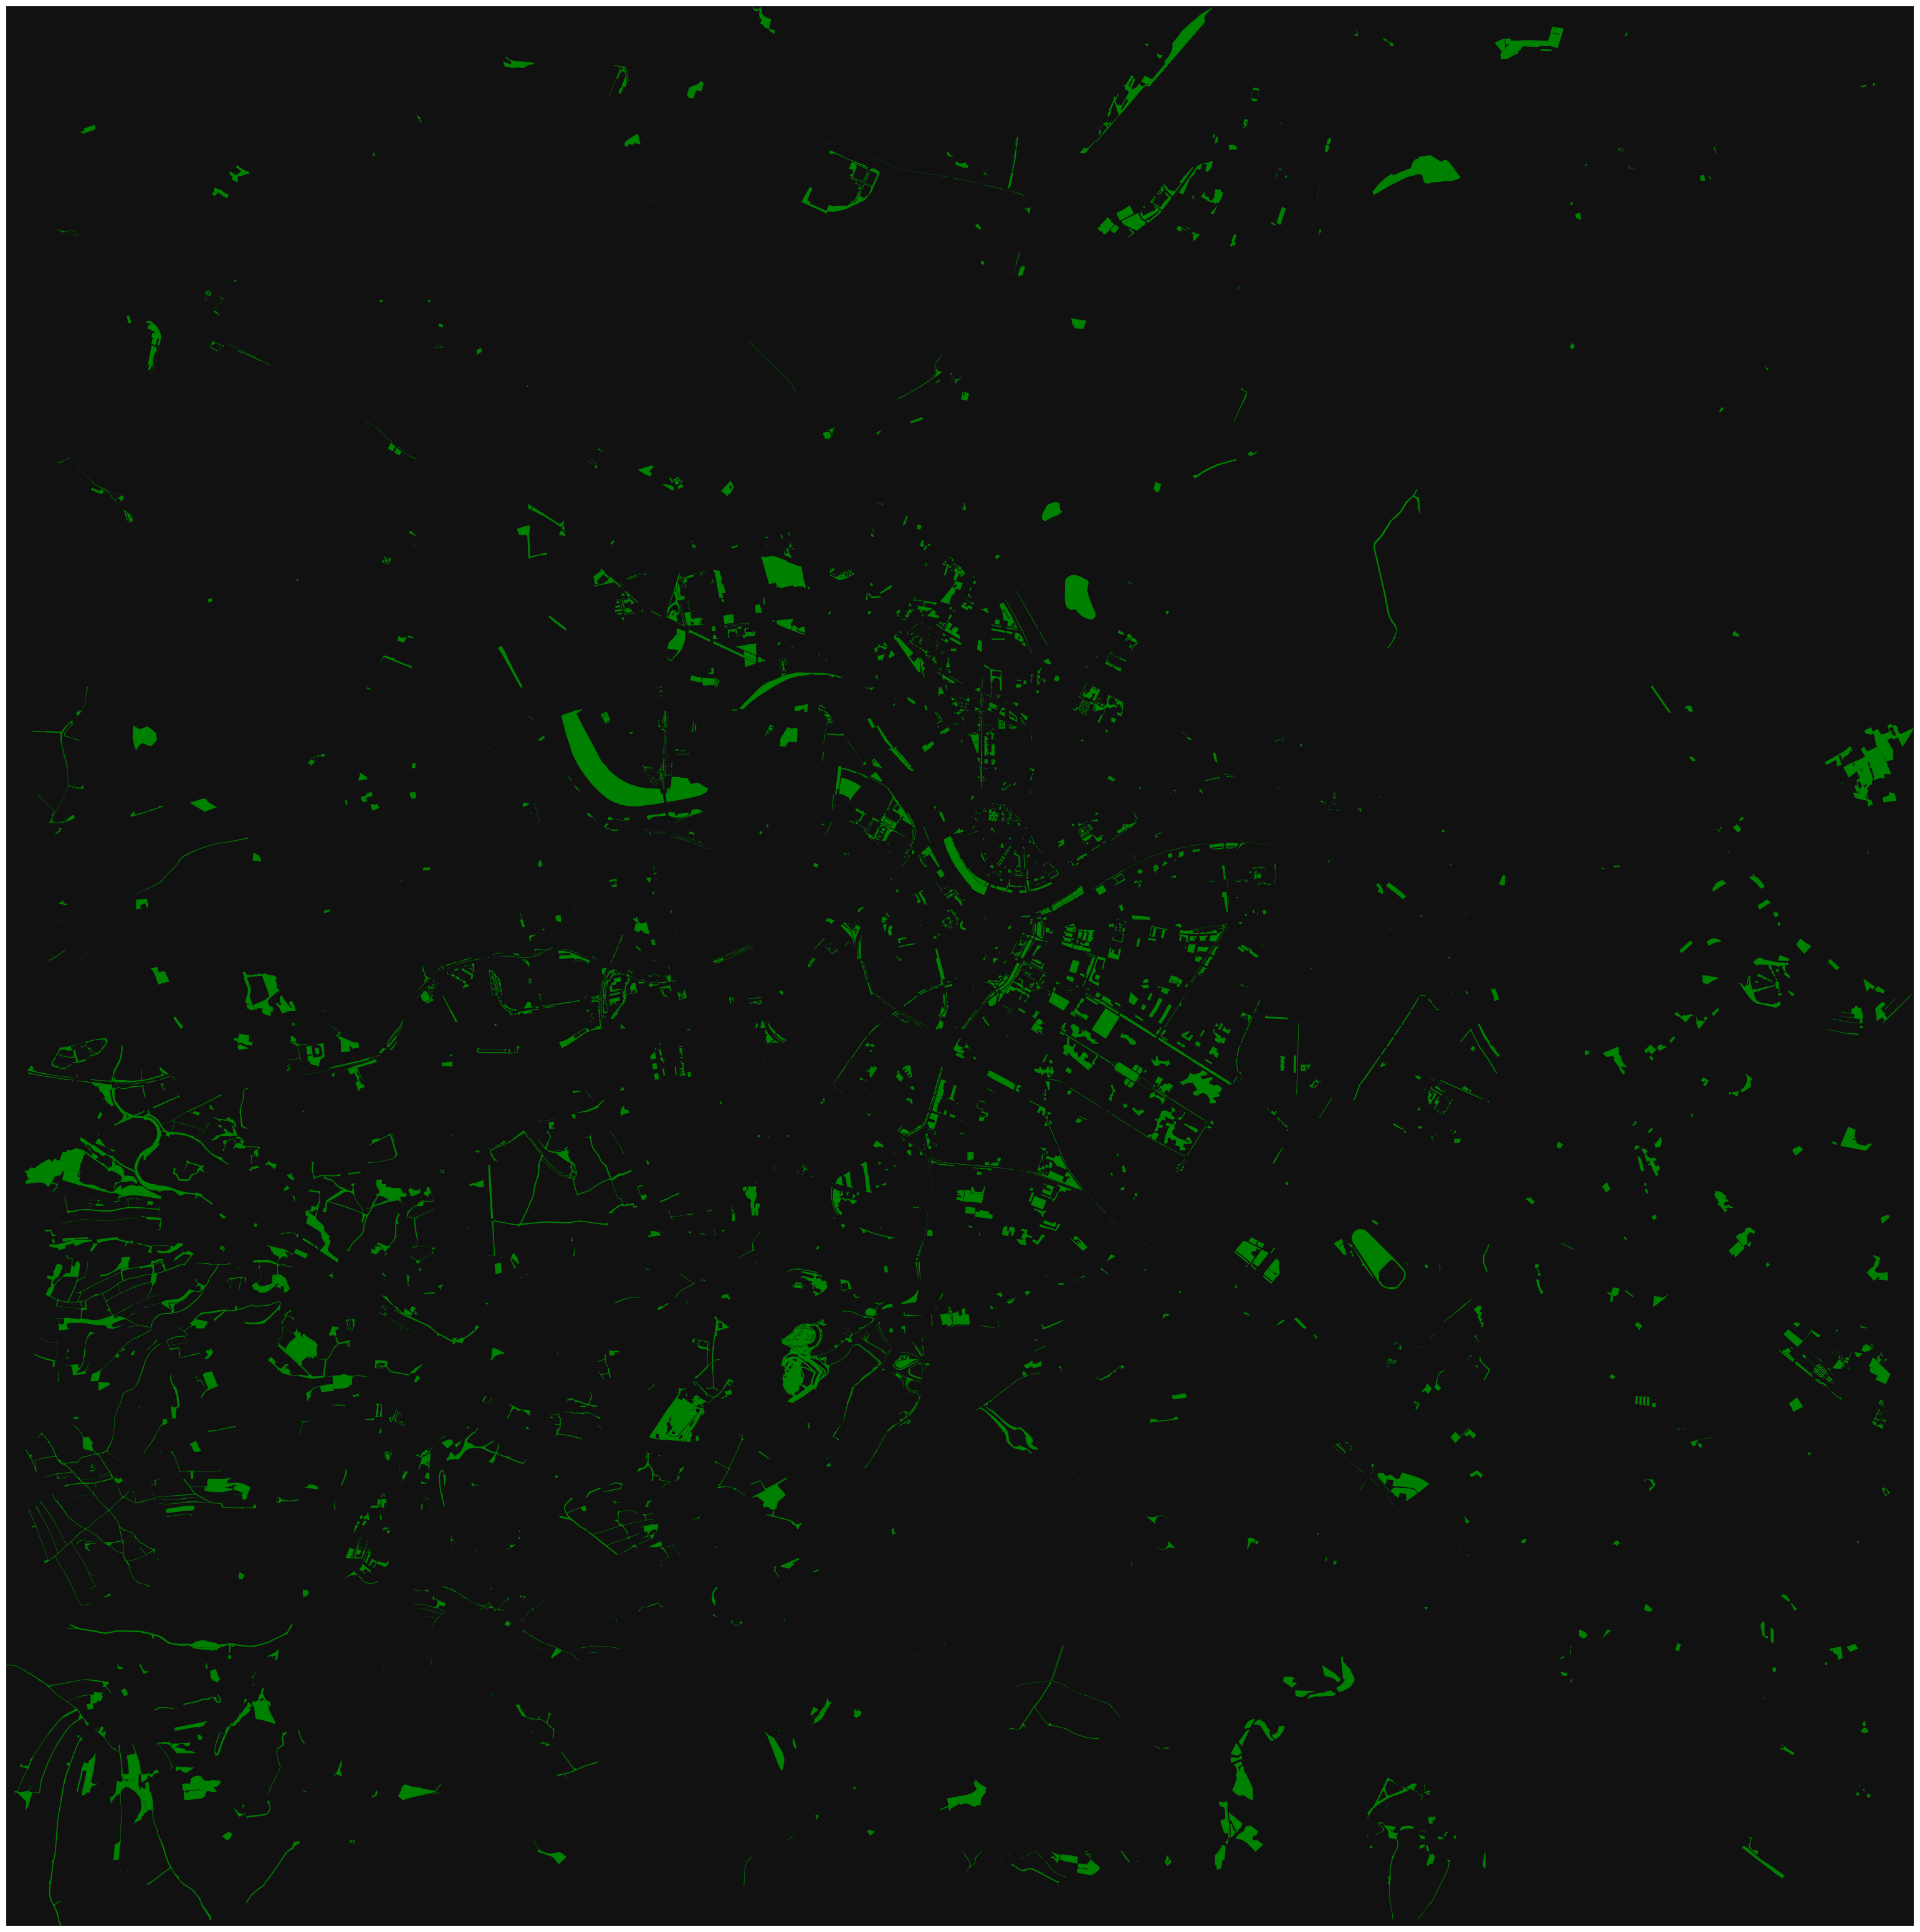

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

c:\Users\purva\anaconda3\lib\site-packages\osmnx\graph.py:88: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(
c:\Users\purva\anaconda3\lib\site-packages\osmnx\graph.py:88: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(


<Figure size 640x480 with 0 Axes>

c:\Users\purva\anaconda3\lib\site-packages\osmnx\graph.py:88: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(


<Figure size 640x480 with 0 Axes>

C:\Users\purva\AppData\Local\Temp\ipykernel_5612\3723225691.py:239: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  lakes = ox.geometries_from_point(point, dist=10000, tags={'landuse': 'salt_pond', 'leisure': 'swimming_pool', 'natural': 'wetland'})


<Figure size 640x480 with 0 Axes>

In [4]:
# Visualizing Ahmedabad

import osmnx as ox
import networkx as nx

# Define city/cities

# Get data for places

'''
places = ["Dresden, DE"]
G = ox.graph_from_place(places,  retain_all=True, simplify = True, network_type='all')
'''

point = (51.050407, 13.737262)
# Center of map
latitude = 51.050407
longitude = 13.737262

bgcolor = "#061529"


grass_area = ox.geometries_from_point(point, dist=10000, tags={'landuse': 'grass', 'leisure': 'garden'})
grass_color = '#008000'
fig, ax = ox.plot.plot_footprints(grass_area, figsize=(40, 40), dpi=300, save=False, color=grass_color)



G = ox.graph_from_point(point, dist=10000, retain_all=True, simplify = True, network_type='all')

u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    

# List to store colors
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.15
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#d5d5d5"
            linewidth = 0.35
        else:
            color = "#ededed"
            linewidth = 0.45
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)
            


fig, ax = ox.plot_graph(G, node_size=0,figsize=(40, 40), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1, ax=ax)

'''
# Bbox sides
north = latitude + 0.15
south = latitude - 0.15
east = longitude + 0.15
west = longitude - 0.15

fig, ax = ox.plot_graph(G, node_size=0, bbox = (north, south, east, west),
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

'''

fig.tight_layout(pad=0)
#Saves only roadmap
#fig.savefig("Ahmedabad_roadMap.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=False)


# G_bike = ox.graph_from_point(point, dist=10000, retain_all=True, simplify = True, network_type='bike')

# u = []
# v = []
# key = []
# data = []
# for uu, vv, kkey, ddata in G_bike.edges(keys=True, data=True):
#     u.append(uu)
#     v.append(vv)
#     key.append(kkey)
#     data.append(ddata)    

# # List to store colors
# roadColors = []
# roadWidths = []

# for item in data:
#     if "length" in item.keys():
#         if item["length"] <= 100:
#             linewidth = 0
#             color = "#dc143c" 
            
#         elif item["length"] > 100 and item["length"] <= 200:
#             linewidth = 0
#             color = "#dc143c"
            
#         elif item["length"] > 200 and item["length"] <= 400:
#             linewidth = 0
#             color = "#dc143c"
            
#         elif item["length"] > 400 and item["length"] <= 800:
#             color = "#dc143c"
#             linewidth = 0.5
#         else:
#             color = "#dc143c"
#             linewidth = 0.75
#     else:
#         color = "#dc143c"
#         linewidth = 1
            
#     roadColors.append(color)
#     roadWidths.append(linewidth)
            


# fig, ax = ox.plot_graph(G_bike, node_size=0,figsize=(40, 40), 
#                         dpi = 300,bgcolor = bgcolor,
#                         save = False, edge_color=roadColors,
#                         edge_linewidth=roadWidths, edge_alpha=1, ax=ax)





G1 = ox.graph_from_point(point, dist=10000, dist_type='bbox', network_type='all', 
                        simplify=True, retain_all=True, truncate_by_edge=False, clean_periphery=False, custom_filter='["natural"~"water"]')
G2 = ox.graph_from_point(point, dist=10000, dist_type='bbox', network_type='all', 
                        simplify=True, retain_all=True, truncate_by_edge=False, clean_periphery=False, custom_filter='["waterway"~"river"]')
Gwater = nx.compose(G1, G2)



u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gwater.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors = []
roadWidths = []

# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#00ffff"
            linewidth = 5
        else:
            color = "#00ffff"
            linewidth = 1.25
    else:
        color = "#00ffff"
        linewidth = 0.5
    roadColors.append(color)    
    roadWidths.append(linewidth)



fig, ax = ox.plot_graph(Gwater, node_size=0,figsize=(40, 40), 
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1, ax=ax)


G3 = ox.graph_from_point(point, dist=10000, dist_type='bbox', network_type='all', 
                        simplify=True, retain_all=True, truncate_by_edge=False, clean_periphery=False, custom_filter='["waterway"~"canal"]')

u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G3.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors = []
roadWidths = []

# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#5dc1b9"
            linewidth = 2.5
        else:
            color = "#5dc1b9"
            linewidth = 1
    else:
        color = "#5dc1b9"
        linewidth = 0.5
    roadColors.append(color)    
    roadWidths.append(linewidth)



fig, ax = ox.plot_graph(G3, node_size=0,figsize=(40, 40), 
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1, ax=ax)


lakes = ox.geometries_from_point(point, dist=10000, tags={'landuse': 'salt_pond', 'leisure': 'swimming_pool', 'natural': 'wetland'})
fig, ax = ox.plot.plot_footprints(lakes, figsize=(40, 40), dpi=300, save=False, color='#5dc1b9', ax=ax)


# grass_area = ox.geometries_from_point(point, dist=10000, dist_type='bbox', network_type='all', 
#                         simplify=True, retain_all=True, truncate_by_edge=False, clean_periphery=False, custom_filter='["landuse"~"forest|grass"]')

# grass_color = '#afe1af'

# fig, ax = ox.plot.plot_footprints(grass_area, figsize=(27, 40), dpi=300, save=False, color=grass_color)



fig.tight_layout(pad=0)
fig.savefig("Dresden_city_grass.png", dpi=600, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)